# **Data Science for Finance** <p>
**by: @Alexander Alves** - [Linkedin](https://www.linkedin.com/in/alexander77alves/) <p>

# **Video game sales dataset** <p>
Video game sales and ratings data extracted from VzCharts

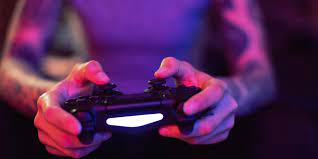

# **About Dataset** <p>
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

[Download the database](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?datasetId=189386&sortBy=voteCount)

In [1]:
# Required Libs

# Libs for Modeling and Matrices
import numpy as np
import pandas as pd

# Libs for graphical analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Lib to ignore warnings
import warnings

# Disabling warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
Database = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Checking
Database.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Dimension
Database.shape

(1034, 9)

In [4]:
# Null
Database.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

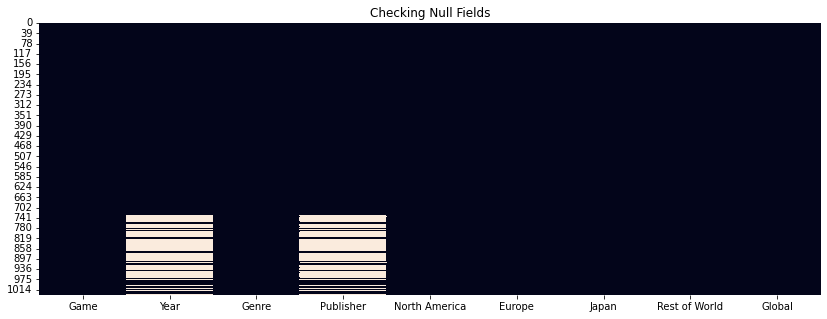

In [5]:
# Graphic Nulls
plt.figure( figsize = (14, 5) )
plt.title('Checking Null Fields')
sns.heatmap( Database.isnull(), cbar = False );

In [ ]:
# Removing null values
Database.dropna( inplace = True )

In [6]:
# Statistics
Database.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


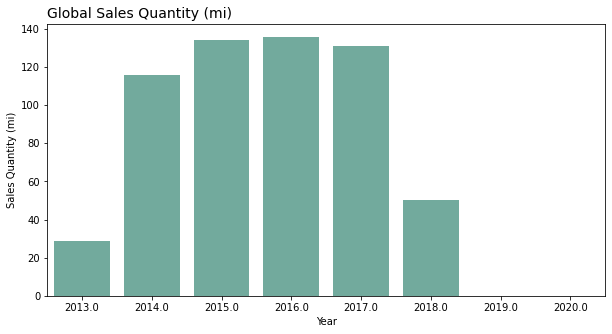

In [7]:
# Image size
plt.figure( figsize = (10, 5) )

# Title
plt.title('Global Sales Quantity (mi)', loc = 'left', fontsize = 14)

# Graphic
sns.barplot( data = Database, x = 'Year', y = 'Global', ci = None, color = '#69b3a2', estimator = sum)

# Label
plt.ylabel('Sales Quantity (mi)');

In [8]:
# Remove the years
Database = Database.loc[ (Database['Year'] != 2019) & (Database['Year'] != 2020) ]

# Check
Database.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


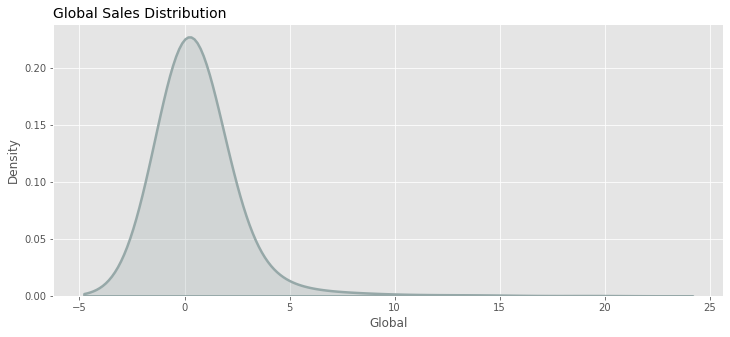

In [9]:
# Size 
plt.figure( figsize = (12,5) )

# Style
plt.style.use('ggplot')

# Title 
plt.title('Global Sales Distribution', loc = 'left', fontsize = 14)

# Plot
sns.kdeplot( Database['Global'], shade = True, bw = 1, color = '#96a8a8', linewidth = 2.5 );

In [ ]:
# Group by year
Database.groupby( by = ['Year'] ).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


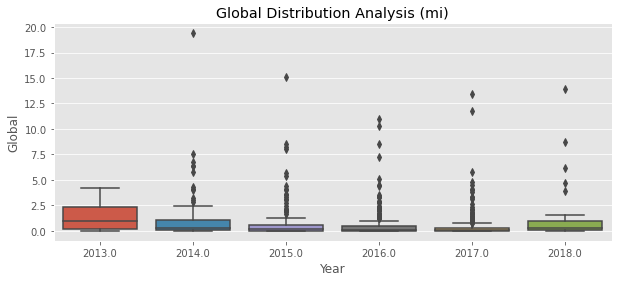

In [10]:
# Size 
plt.figure( figsize = (10, 4) )

# Title
plt.title('Global Distribution Analysis (mi)')

# Plot
sns.boxplot( data = Database, x = 'Year', y = 'Global');

In [11]:
Database.loc[Database['Global'] >= 10 ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [12]:
Database

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [13]:
Analysis = Database.groupby( by=['Year'] ).sum().reset_index()

# Analisando a proporção dos 100% de cada continente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( Analysis['North America'], Analysis['Global']) ]
Europe = [ Europe / Total * 100 for Europe, Total in zip( Analysis['Europe'], Analysis['Global']) ]
Japan = [ Japan / Total * 100 for Japan, Total in zip( Analysis['Japan'], Analysis['Global']) ]
World = [ World / Total * 100 for World, Total in zip( Analysis['Rest of World'], Analysis['Global']) ]

America, Europe, Japan, World

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [14]:
Analysis

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


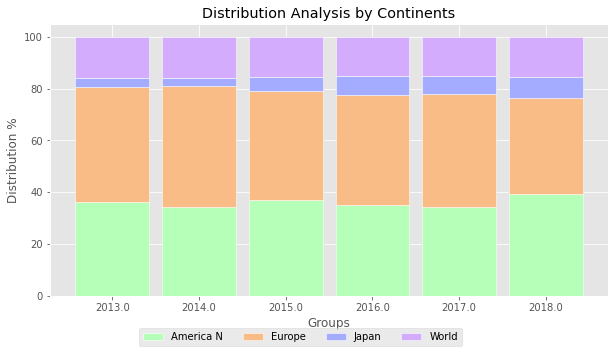

In [16]:
# Size 
plt.figure( figsize = (10, 5) )

# Bar Width in the Graph
Width_Bar = 0.85
Labels = Analysis['Year']
Groups = [0, 1, 2, 3, 4, 5]

# Title
plt.title('Distribution Analysis by Continents')

# Plot of America
plt.bar( Groups, America, width = Width_Bar, color = '#b5ffb9', edgecolor = 'white')

# Plot of Europe
plt.bar( Groups, Europe, bottom = America, width = Width_Bar, color = '#f9bc86', edgecolor = 'white')

# Plot of Japan
plt.bar( Groups, Japan, bottom = [ A+B for A,B in zip(America, Europe) ], width = Width_Bar, color = '#a3acff', edgecolor = 'white')

# Plot of World
plt.bar( Groups, World, bottom = [ A+B+C for A,B,C in zip(America, Europe, Japan) ], width = Width_Bar, color = '#d3acfe', edgecolor = 'white')

# Labels
plt.xticks( Groups, Labels )
plt.xlabel('Groups')
plt.ylabel('Distribution %')

# Legenda
plt.legend(['America N', 'Europe', 'Japan', 'World'], loc = 'upper left', bbox_to_anchor = (0.15, -0.1), ncol = 4);

In [17]:
Database['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [18]:
Database

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [19]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

Database['Producer'] = Funcao_Label.fit_transform( Database['Publisher'] )
Database['Genre_Id'] = Funcao_Label.fit_transform( Database['Genre'] )
Database['Game_Id'] = Funcao_Label.fit_transform( Database['Game'] )

Database.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Producer,Genre_Id,Game_Id
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,334
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,124
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,657
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,128
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,271


In [20]:
# Color Palette
# Models_Colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 
#  'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
#  'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
#  'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
#  'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
#  'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 
#  'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
#  'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
#  'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
#  'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
#  'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']
Color_Palette = sns.color_palette('husl', 15)
Color_Palette

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

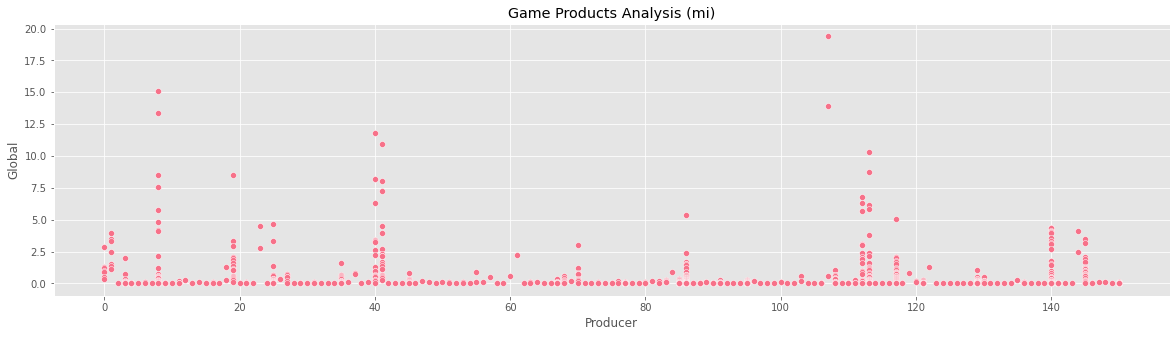

In [21]:
plt.figure( figsize = (20, 5) )
plt.title('Game Products Analysis (mi)')
sns.scatterplot( data = Database, x = 'Producer', y = 'Global', color = Color_Palette[0] );

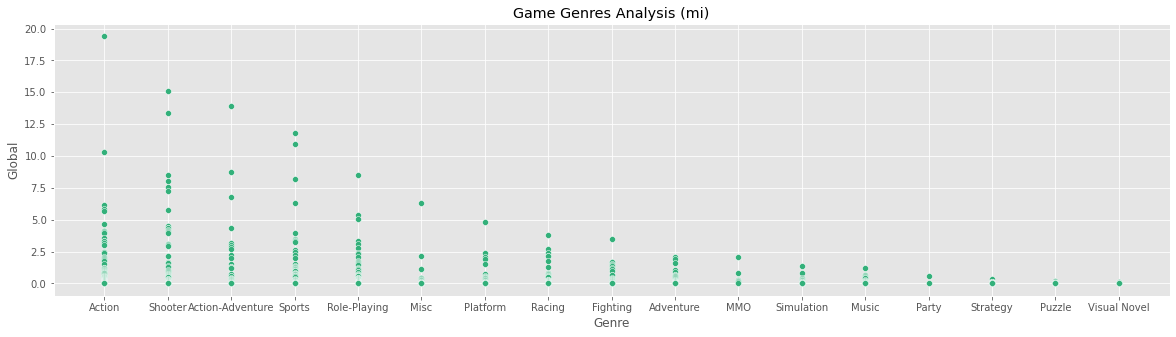

In [22]:
plt.figure( figsize = (20, 5) )
plt.title('Game Genres Analysis (mi)')
sns.scatterplot( data = Database, x = 'Genre', y = 'Global', color = Color_Palette[6] );

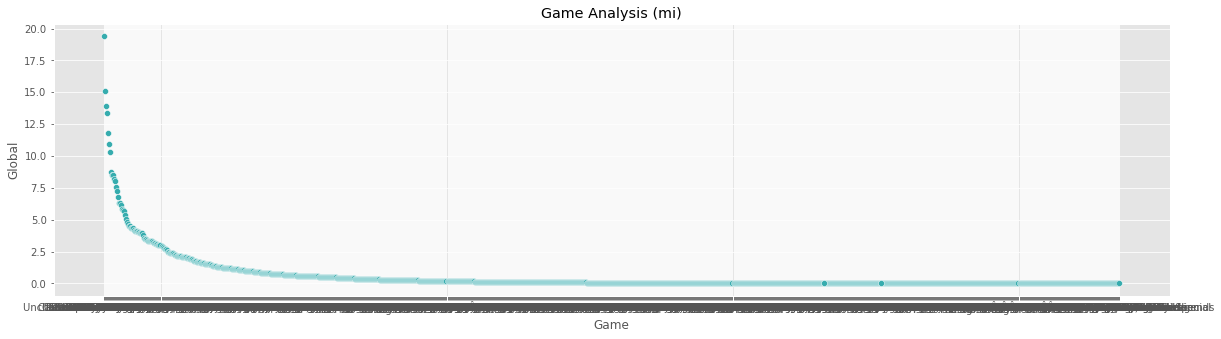

In [24]:
plt.figure( figsize = (20, 5) )
plt.title('Game Analysis (mi)')
sns.scatterplot( data = Database, x = 'Game', y = 'Global', color = Color_Palette[8] );